In [1]:
import api_wrapper as api
import os
import pandas as pd
import time

### Query user profile info

In [2]:
token = pd.read_csv("/Users/dankoban/Documents/EM6586_DB_Management/bearer_token.csv")
os.environ["BEARER_TOKEN"] = token['token'][0]

seed_accounts = ['NFL']
seed_account_info = api.get_users(usernames=seed_accounts)                    
seed_account_info.head()

,user_id,username,name,description,location,created_at,followers_count,following_count,tweet_count,listed_count
0,19426551,NFL,NFL,Official Twitter account of the National Footb...,NaN,2009-01-24T01:28:06.000Z,26509648.0,2724.0,220054.0,48674.0


### Query for posting activity

In [3]:
tweets = api.get_user_activity(usernames=seed_accounts, record_count = 2000)

token: 7140dibdnow9c7btw3w3y3894ymchn96u66xnzu96ibeg
token: 7140dibdnow9c7btw3w3xyze93ld3c1f2721g8qk6xohf
token: 7140dibdnow9c7btw3w3xwuo8bpqxcch06n1nwgff5um0
token: 7140dibdnow9c7btw3w3xws9yfri8nzi4sspafklrm5vb
token: 7140dibdnow9c7btw3w3j88qyywqx9wc8tef0le66n3nd
token: 7140dibdnow9c7btw3w3j3zw95b6pl98qfzwg3xd68to6
token: 7140dibdnow9c7btw3w3izqqqwjr3q85qmmsanlul0ze8
token: 7140dibdnow9c7btw3w3itdgglvxcktaw72xpmbop6w4z
token: 7140dibdnow9c7btw3w3ir612vh0v9xipy9tjb509lqns
token: 7140dibdnow9c7btw3w340jkq65y05fxm126f2ak8v8dt
token: 7140dibdnow9c7btw3w340iobdf9cepzljht27q5x5flj
token: 7140dibdnow9c7btw3w340hrzk7oetoayktc6ndekfkmt
token: 7140dibdnow9c7btw3w33yejse6xkuv58ibfrrx2hn1gz
token: 7140dibdnow9c7btw3w33wafchhku1ef9a5pxk2jbmgj8
token: 7140dibdnow9c7btw3w33w8mcsnh1ok6nes0btxgqvad5
token: 7140dibdnow9c7btw3w33u5p5lu734fy35u1rrinn8mr6
token: 7140dibdnow9c7btw3w33s0yo5yrt6q8neoemqcl4ff3o
token: 7140dibdnow9c7btw3w33ryv6ngrv1gizv29new1zwdv4
token: 7140dibdnow9c7btw3w33pv1g41lrrh56tbmrsf

In [4]:
(tweets.
 sort_values('like_count', ascending = False).
 filter(['author_screen_name', 'text', 'conversation_id', 
         'like_count', 'reply_count', 'retweet_count', 
         'referenced_tweet_type']).
 head())

,author_screen_name,text,conversation_id,like_count,reply_count,retweet_count,referenced_tweet_type
960,NFL,BLINDING LIGHTS 🙌 @TheWeeknd #PepsiHalftime #S...,1358591785925246981,86786,2101,24263,original_tweet
962,NFL,🔥🔥🔥 @TheWeeknd #PepsiHalftime #SBLV https://t....,1358589395914416129,60867,1897,9181,original_tweet
295,NFL,BREAKING: Drew Brees announces retirement afte...,1371207771983638529,54025,620,9021,original_tweet
1742,NFL,This is leadership 💯 @PatrickMahomes @tkelce \...,1353819763613388801,53856,342,8598,original_tweet
934,NFL,Seven. 🐐\n\n@TomBrady | #SBLV https://t.co/Htr...,1358615158562709505,49961,733,11466,original_tweet


### Extract Most Liked URLs

In [5]:
most_liked_urls = tweets['id'][tweets['like_count'] >= 10000].tolist()
len(most_liked_urls)

92

In [6]:
el = api.extract_el(tweets)
urls = el[el['edge_type'] == 'url'].rename(columns={'to': 'url'})
urls[['status_id', 'url']][urls['status_id'].isin(most_liked_urls)]

,status_id,url
4473,1374486090770382853,https://t.co/VJlfzddvs3
4476,1374454112327069699,https://t.co/yy5FggIxgW
4490,1374336669000859651,https://t.co/Cr50Aqv6UK
4493,1374119900109697024,https://t.co/3J2BThYdTP
4507,1373990347106308099,https://t.co/YylRI1TE6t
...,...,...
6253,1353484381222932480,https://t.co/FgvDfg96IB
6255,1353483062244372481,https://t.co/0dwUMXCtUF
6256,1353482615706144769,https://t.co/R1TqzZpQu4
6358,1353424855320977408,https://t.co/VAkhZKw0iP


### Extract Hashtags

In [7]:
hashtags = el[el['edge_type'] == 'hashtag'].rename(columns={'to': 'hashtag'})
top_hashtags = (hashtags.groupby('hashtag').
                agg({'status_id': len}).                  
                reset_index().
                rename(columns={'hashtag': 'hashtag', 'status_id': 'hashtag_count'}).
                sort_values('hashtag_count', ascending = False).
                reset_index(drop = True).
                query('hashtag_count >= 5'))
top_hashtags

,hashtag,hashtag_count
0,SBLV,327
1,GoBucs,100
2,NFLPlayoffs,94
3,NFLProBowlVerzuz,89
4,ProBowl,84
5,RunItBack,73
6,TBvsGB,71
7,SBOpeningNight,62
8,BUFvsKC,47
9,NFLHonors,45


### Tweets by hashtag

In [8]:
pd.set_option('display.max_colwidth', None)
tweets_by_hashtag = (hashtags[['hashtag', 'status_id']][hashtags['hashtag'].isin(top_hashtags.hashtag)].             
                     merge(tweets[['id','text']], how='left', left_on='status_id', right_on='id').
                     filter(['hashtag', 'text']).
                     sort_values('hashtag').
                     reset_index(drop=True))
tweets_by_hashtag.head(10)

,hashtag,text
0,AskULTRA,.@cfrelund is here answering your NFL questions! Use #AskULTRA to have your question answered.
1,AskULTRA,@NFL Q: Who’s your best bet to win #SuperBowl MVP?\n#AskULTRA @cfrelund\n- @TheJShield\n\nA: https://t.co/N5QLyl6Pzc
2,AskULTRA,RT @NFL: .@cfrelund is here answering your NFL questions! Use #AskULTRA to have your question answered.
3,AskULTRA,"@NFL Q: #AskULTRA Ok, you have carried my @Chiefs all the way to the SB. Give me your thoughts on the game and what you see as the final score! KC 41-TB 34!\n- @RoyalKingdom71\n\nA: https://t.co/B3hZAL7yAK"
4,AskULTRA,@NFL Q: #AskULTRA who are you rooting for chiefs or bucs\n- @DelashmetTyler\n\nA: https://t.co/WnWP7ztxMQ
5,AskULTRA,@NFL Q: #AskULTRA Will Tom Brady retire if he wins the Super Bowl?\n- @BrandonDawe_\n\nA: https://t.co/kra5DfcJLi
6,AskULTRA,@NFL Q: #AskULTRA Who do you think is winning the Super Bowl and Why?\n- @MicaMarksRBLX\n\nA: https://t.co/8PrauHEOrv
7,BUFvsKC,The @BuffaloBills recover the onside kick! #BillsMafia #NFLPlayoffs\n\n📺: #BUFvsKC on CBS\n📱: NFL app // Yahoo Sports app: https://t.co/RTcXvhOR4u https://t.co/t1PCOnlhDe
8,BUFvsKC,Allen to Knox!\n\nThe Bills lead by 9 early. #BillsMafia #NFLPlayoffs \n\n📺: #BUFvsKC on CBS\n📱: NFL app // Yahoo Sports app: https://t.co/RTcXvhOR4u https://t.co/J5VnjxoQPK
9,BUFvsKC,The @BuffaloBills recover the fumble inside the 5! #NFLPlayoffs #BillsMafia \n\n📺: #BUFvsKC on CBS\n📱: NFL app // Yahoo Sports app: https://t.co/RTcXvhOR4u https://t.co/DuEcjADKyd


### Clean text

In [9]:
import re
tweets_by_hashtag['text'] = tweets_by_hashtag['text'].apply(lambda x: re.sub(r'http\S+', ' ', x))
tweets_by_hashtag['text'] = tweets_by_hashtag['text'].apply(lambda x: re.sub(r'@\S+', ' ', x))
tweets_by_hashtag['text'] = tweets_by_hashtag['text'].apply(lambda x: re.sub(r'\W+', ' ', x))
tweets_by_hashtag.head(10)

,hashtag,text
0,AskULTRA,is here answering your NFL questions Use AskULTRA to have your question answered
1,AskULTRA,Q Who s your best bet to win SuperBowl MVP AskULTRA A
2,AskULTRA,RT is here answering your NFL questions Use AskULTRA to have your question answered
3,AskULTRA,Q AskULTRA Ok you have carried my all the way to the SB Give me your thoughts on the game and what you see as the final score KC 41 TB 34 A
4,AskULTRA,Q AskULTRA who are you rooting for chiefs or bucs A
5,AskULTRA,Q AskULTRA Will Tom Brady retire if he wins the Super Bowl A
6,AskULTRA,Q AskULTRA Who do you think is winning the Super Bowl and Why A
7,BUFvsKC,The recover the onside kick BillsMafia NFLPlayoffs BUFvsKC on CBS NFL app Yahoo Sports app
8,BUFvsKC,Allen to Knox The Bills lead by 9 early BillsMafia NFLPlayoffs BUFvsKC on CBS NFL app Yahoo Sports app
9,BUFvsKC,The recover the fumble inside the 5 NFLPlayoffs BillsMafia BUFvsKC on CBS NFL app Yahoo Sports app


### Pool tweets by hashtag

In [10]:
pooled_df = tweets_by_hashtag.groupby("hashtag")["text"].apply(lambda x: "".join(x)).reset_index()
pooled_df 

hashtag  \
0                 AskULTRA   
1                  BUFvsKC   
2               BillsMafia   
3        BlackHistoryMonth   
4            ChiefsKingdom   
5                   GoBucs   
6                 GoPackGo   
7            InspireChange   
8   InternationalWomensDay   
9             LombardiSBLV   
10                NFLDraft   
11               NFLHonors   
12             NFLPlayoffs   
13        NFLProBowlVerzuz   
14            NFLWayToPlay   
15                 PFHOF21   
16           PepsiHalftime   
17                 ProBowl   
18               RunItBack   
19                    SBLV   
20          SBOpeningNight   
21         SayTheirStories   
22             ShowtimeCam   
23               SuperBowl   
24                  TBvsGB   
25            ThankYouDrew   
26          TikTokTailgate   
27                   WPMOY   
28      WomensHistoryMonth   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

### Create a corpus and dictionary

In [11]:
from sklearn.feature_extraction.text import CountVectorizer 
from gensim import corpora, models, matutils

texts = pooled_df['text'].tolist()

vectorizer = CountVectorizer(stop_words='english', 
                             ngram_range = (1,1), 
                             token_pattern="\\b[a-z][a-z][a-z]+\\b",
                             max_df=1.0, 
                             min_df=3,
                             max_features=1000000) 

vectorizer.fit(texts)
doc_word = vectorizer.transform(texts).transpose()
corpus = matutils.Sparse2Corpus(doc_word)
    
word2id = dict((v, k) for v, k in vectorizer.vocabulary_.items())
id2word = dict((v, k) for k, v in vectorizer.vocabulary_.items())

dictionary = corpora.Dictionary()
dictionary.id2token = id2word
dictionary.token2id = word2id
    
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 473
Number of documents: 29


### Fit a topic model

In [12]:
from gensim.models.wrappers import LdaMallet
from gensim.models import CoherenceModel

cm_values = []
for k in range(5,15):
    os.environ.update({'MALLET_HOME':r'/Users/dankoban/mallet-2.0.8/'})

    lda = LdaMallet(mallet_path = '/Users/dankoban/mallet-2.0.8/bin/mallet', 
                    corpus=corpus, num_topics=k, id2word=dictionary, 
                    workers = 20, iterations = 500, random_seed = 1)

    cm = CoherenceModel(model=lda, corpus=corpus, coherence='u_mass')
    coherence_val = cm.get_coherence()
    print(str(k) + ": " + str(coherence_val))
    cm_values.append(coherence_val)

5: -1.3547418381743364
6: -1.0041018861125102
7: -0.8637127802055777
8: -0.7899748940435467
9: -0.9227516335839999
10: -1.0568569853740803
11: -0.9916738853836716
12: -0.9300901023380113
13: -1.2372415761134017
14: -1.1166541659154807


<AxesSubplot:xlabel='k', ylabel='val'>

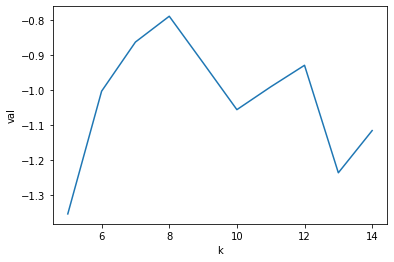

In [15]:
plot_df = pd.DataFrame({'k': range(5,15), 'val': cm_values})
import seaborn as sns
sns.lineplot(x = 'k', y = 'val', data = plot_df)

In [16]:
lda = LdaMallet(mallet_path = '/Users/dankoban/mallet-2.0.8/bin/mallet', 
                corpus=corpus, num_topics=13, id2word=dictionary, 
                workers = 20, iterations = 500, random_seed = 1)

In [17]:
tm_results = lda[corpus]

corpus_topics = [sorted(topics, 
                        key=lambda record: -record[1])[0] for topics in tm_results]

topics = [[(term, round(wt, 3)) for term, wt in lda.show_topic(n, topn=10)] 
                                for n in range(0, lda.num_topics)]

topics_df = pd.DataFrame([', '.join([term for term, wt in topic]) for topic in topics], 
                         columns = ['Terms per Topic'], 
                         index=['Topic'+str(t) for t in range(1, lda.num_topics+1)] )
topics_df

,Terms per Topic
Topic1,"nflhonors, year, wpmoy, cbs, award, man, tonight, player, payton, legend"
Topic2,"live, sbopeningnight, twitter, andy, reid, gobucs, david, lavonte, school, speaks"
Topic3,"app, yahoo, nfl, cbs, sports, gobucs, bowl, super, amp, tampa"
Topic4,"showtimecam, women, chiefskingdom, football, game, history, celebrate, rookie, joined, question"
Topic5,"time, today, win, moment, coach, play, make, pepsihalftime, work, days"
Topic6,"tbvsgb, fox, gopackgo, nfl, gobucs, brady, rodgers, nfc, yards, int"
Topic7,"app, sports, nflplayoffs, yahoo, championship, sack, zone, ball, inside, fumble"
Topic8,"bufvskc, nfl, cbs, billsmafia, afc, allen, josh, lead, kelce, recover"
Topic9,"inspirechange, season, saytheirstories, players, nfl, coaches, program, helmet, honored, life"
Topic10,"nfl, edition, watch, live, tonight, social, presented, bowl, pro, amp"


### Evaluate topic quality

In [22]:
cm = CoherenceModel(model=lda, corpus=corpus, coherence='u_mass')
pd.DataFrame({'topic': topics_df.index, 
              'coherence': cm.get_coherence_per_topic(),
              'terms': topics_df['Terms per Topic'].tolist()})


,topic,coherence,terms
0,Topic1,-1.125067,"nflhonors, year, wpmoy, cbs, award, man, tonight, player, payton, legend"
1,Topic2,-0.618178,"live, sbopeningnight, twitter, andy, reid, gobucs, david, lavonte, school, speaks"
2,Topic3,-0.799825,"app, yahoo, nfl, cbs, sports, gobucs, bowl, super, amp, tampa"
3,Topic4,-6.045237,"showtimecam, women, chiefskingdom, football, game, history, celebrate, rookie, joined, question"
4,Topic5,-1.074117,"time, today, win, moment, coach, play, make, pepsihalftime, work, days"
5,Topic6,-0.492385,"tbvsgb, fox, gopackgo, nfl, gobucs, brady, rodgers, nfc, yards, int"
6,Topic7,-0.930291,"app, sports, nflplayoffs, yahoo, championship, sack, zone, ball, inside, fumble"
7,Topic8,-0.638697,"bufvskc, nfl, cbs, billsmafia, afc, allen, josh, lead, kelce, recover"
8,Topic9,-0.976671,"inspirechange, season, saytheirstories, players, nfl, coaches, program, helmet, honored, life"
9,Topic10,-0.913596,"nfl, edition, watch, live, tonight, social, presented, bowl, pro, amp"
